In [541]:
## Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [542]:
## Importing Cat Dataset
import h5py

trainfile = h5py.File("dataset/train_catvnoncat.h5", 'r')
testfile = h5py.File("dataset/test_catvnoncat.h5", 'r')
print(trainfile.keys())



<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [543]:
## Splitting into train and test set

train_x_orig = np.array(trainfile.get('train_set_x'))
train_y = np.array(trainfile.get('train_set_y'))
test_x_orig = np.array(testfile.get('test_set_x'))
test_y = np.array(testfile.get('test_set_y'))

In [544]:
## Understanding the shape of data
print(train_x_orig.shape)
print(train_y.shape)
print(test_x_orig.shape)
print(test_y.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


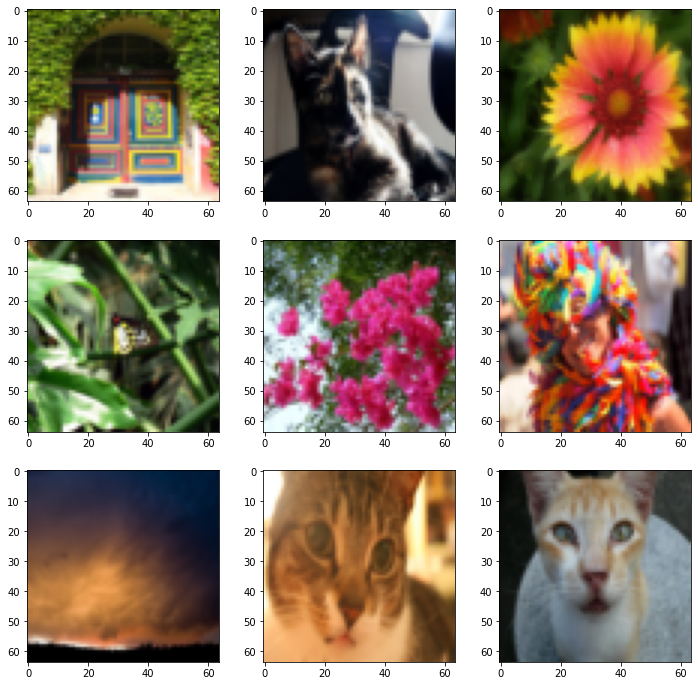

In [545]:
# Visualizing training set
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(train_x_orig[np.random.choice(209)])
plt.show()

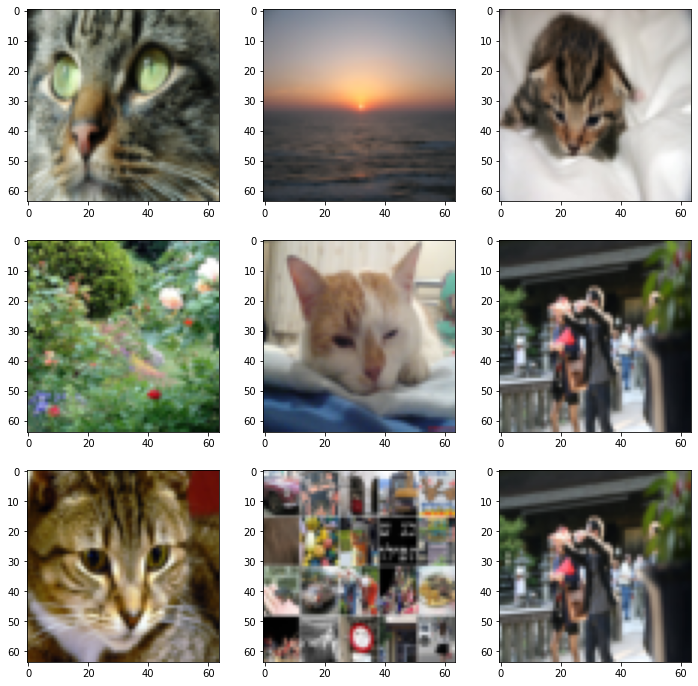

In [546]:
# Visualizing testing set
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(test_x_orig[np.random.choice(50)])
plt.show()

In [547]:
## Data preprocessing

# Converting target variable into a 2d matrix
train_y = train_y.reshape(1,-1)
test_y = test_y.reshape(1,-1)
print(train_y.shape)
print(test_y.shape)

(1, 209)
(1, 50)


In [548]:
# Flattening the X feature set

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
print(train_x_flatten.shape)
print(test_x_flatten.shape)

(12288, 209)
(12288, 50)


In [549]:
# Feature scaling

train_x = train_x_flatten/255
test_x = test_x_flatten/255

In [550]:
## Model creation

#1. Function to Initialize w and b 
#2. Function to calculate sigmoid of any function
#3. Function for forward and backward propagation (input: train_X, train_y, w and b, output: cost, params{dw,db})
#4. Updating w and b(inputs: params, learning rate, w and b, output: w, b)
#5. Function to repeat 3&2-Gradient descent (input: train_X, train_y, w and b, num_of_iteration, learning_rate, output)
#6. Function to predict (input: any_X, any_Y, w and b, output: prediction)
#7. Model Function including all the above function(input: train_X, train_y, test_X, test_y)

In [551]:
#1 Function to Initialize w and b

def initialize_params():
    w = np.zeros((train_x.shape[0],1))
    b = 0
    return w,b

In [552]:
#2. Function to calculate sigmoid of any function

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [553]:
#3. Function for forward and backward propagation (input: train_X, train_y, w and b, output: cost, params{dw,db})

def propagate(w, b, X, y):
    m = X.shape[1]

    #Forward propagation
    A = sigmoid(np.dot(w.T,X)+b)   
    cost = (-1/m)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))

    #Backward propagation
    dZ = A-y
    dw = 1/m*np.dot(X, dZ.T)
    db = 1/m*np.sum(dZ)

    params = {"dw":dw,"db":db}

    return cost, params




In [554]:
#4. Updating w and b(inputs: params, learning rate, w and b, output: w, b)

def optimize(params, w, b, learning_rate=0.001):

    w = w-learning_rate*params['dw']
    b = b - learning_rate*params['db']

    return w, b

In [555]:
#5. Function to repeat 3&2-Gradient descent (input: train_X, train_y, w and b, num_of_iteration, learning_rate, output)

def gradient_descent(X,y, w, b, num_iterations=500, learning_rate=0.001):
    costs=[]
    for i in range(num_iterations):
        cost, params = propagate(w, b, X, y)
        w,b = optimize(params, w, b, learning_rate)
        if (i%100)==0:
            costs.append(cost)
    
    return w,b,costs

In [556]:
#6. Function to predict (input: any_X, any_Y, w and b, output: prediction)

def predict(X,y, w, b):
    A = sigmoid(np.dot(w.T,X)+b)  
    y_pred = np.zeros((1, X.shape[1]))
    for i in range(A.shape[1]):
        if A[0][i]<0.5:
            y_pred[0][i] = 0
        else:
            y_pred[0][i] = 1
    return y_pred

In [557]:
num_iterations=2000
learning_rate = 0.005
w, b = initialize_params()
w, b,costs = gradient_descent(train_x,train_y, w, b, num_iterations, learning_rate)
y_train_pred = predict(train_x, train_y, w, b)
y_test_pred = predict(test_x, test_y, w, b)

print(f"Train Accuracy: {np.sum(y_train_pred[0]==train_y[0])/y_train_pred.shape[1]}")
print(f"Test Accuracy: {np.sum(y_test_pred[0]==test_y[0])/y_test_pred.shape[1]}")

Train Accuracy: 0.9904306220095693
Test Accuracy: 0.7


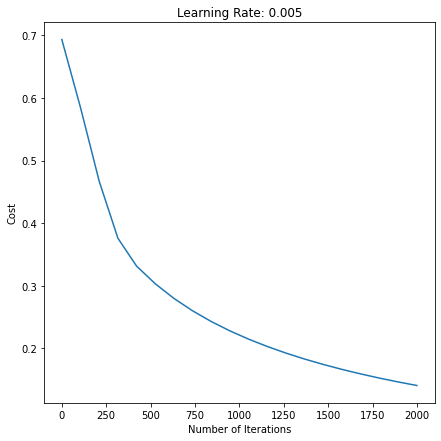

In [558]:
plt.figure(figsize=(7,7))
plt.title(f"Learning Rate: {learning_rate}")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.plot(np.linspace(0,num_iterations, int(num_iterations/100)),costs)
plt.show()